By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/05/10

Videos:
* [[10分鐘搞懂機器學習] 1.9 Python實作 特徵縮放 Feature scaling Normalization Standardization](https://youtu.be/6gO48k84V-A?si=LTmPplA0MhvQdpOg)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


Topic:特徵縮放(feature scaling)


<<原因>> 大部分機器學習演算法，若有不同數量級的特徵，產生的模型效能通常較差。因此，需要利用特徵縮放，將特徵數值轉成相同的數量級。若使用神經網路，輸入的特徵值通常是在[0,1]區間。徵縮放是針對特徵，亦即模型的輸入，一般來說，不需要調整目標值的數量級。

<<例外>> 不需要特徵縮放的機器學習演算法是依靠規則(rule)的演算法，例如:隨機森林

參考文獻 https://en.wikipedia.org/wiki/Feature_scaling

In [1]:
# https://github.com/ageron/handson-ml2
# housing 資料路徑 handson-ml2/datasets/housing/housing.csv

from google.colab import drive
import pandas as pd

# 连接到Google Drive
drive.mount('/content/drive')

# 读取CSV文件
file_path = "/content/drive/My Drive/ML/ch1 data processing/housing.csv"  # 请将文件路径替换为实际的CSV文件路径
housing_prices_data = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# 使用head()
housing_prices_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


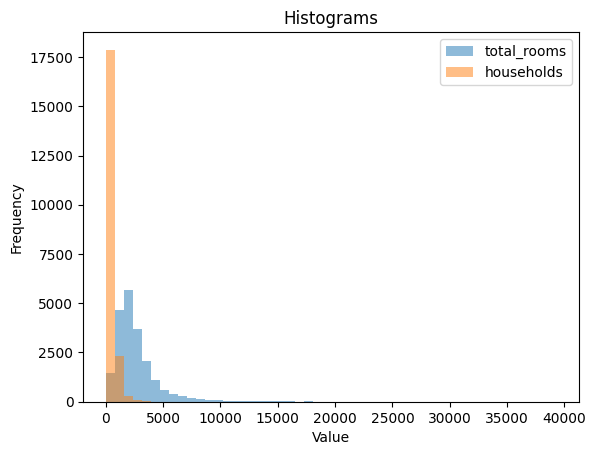

In [ ]:
import matplotlib.pyplot as plt
housing_prices_data[['total_rooms', 'households']].plot.hist(alpha=0.5, bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.show()

方法一: 正規化(normalization or min-max scaling)


優點-確保特徵值在[0,1]；缺點-易受離群值(outlier)影響

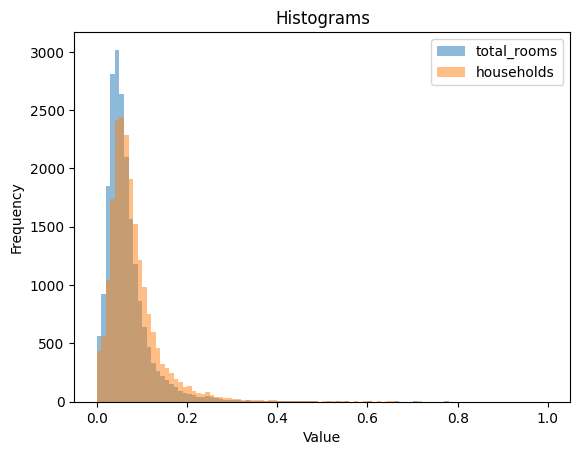

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# df 是您的 DataFrame
df=housing_prices_data.copy()

# 正規化的特徵
columns_to_normalize = ['total_rooms', 'households']

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 對特徵進行正規化
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 繪製長方圖
df[['total_rooms', 'households']].plot.hist(alpha=0.5, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.show()


正規化(normalization or min-max scaling)受離群值(outlier)影響較大

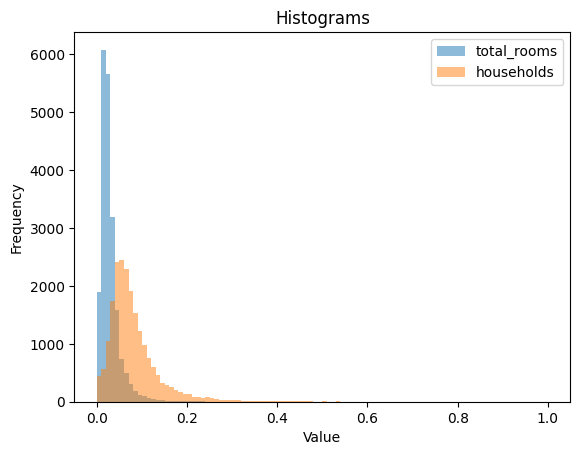

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# df 是您的 DataFrame
df=housing_prices_data.copy()

# 產生離群值
row_num=0
df.loc[df.index[row_num], 'total_rooms'] = 90000


# 正規化的特徵
columns_to_normalize = ['total_rooms', 'households']

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 對特徵進行正規化
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 繪製長方圖
df[['total_rooms', 'households']].plot.hist(alpha=0.5, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.show()






方法二: 標準化(standardization or Z-score normalization)



優點-較不受離群值(outlier)影響；缺點-無法確保特徵值在[0,1]

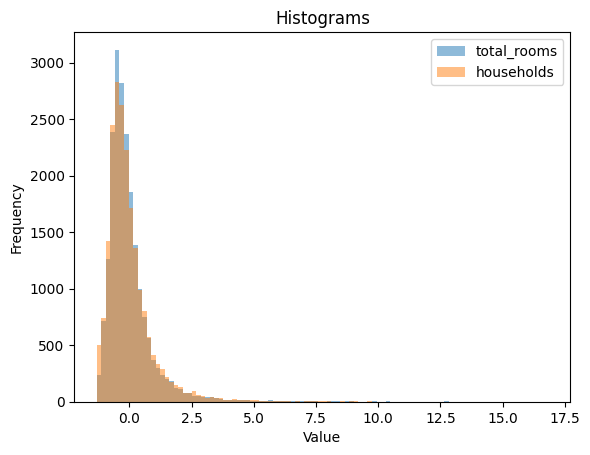

In [ ]:
from sklearn.preprocessing import StandardScaler

# df 是您的 DataFrame
df=housing_prices_data.copy()

# 正規化的特徵
columns_to_standardize = ['total_rooms', 'households']

# 初始化 StandardScaler
scaler = StandardScaler()

# 對特徵進行標準化
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# 繪製長方圖
df[['total_rooms', 'households']].plot.hist(alpha=0.5, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.show()


標準化(standardization or Z-score normalization)較不受離群值(outlier)影響

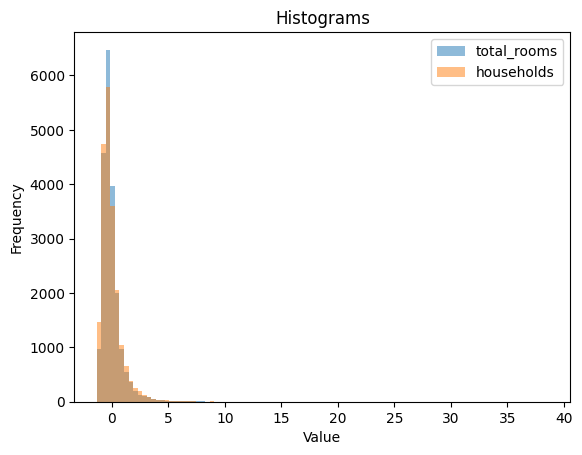

In [ ]:
from sklearn.preprocessing import StandardScaler

# df 是您的 DataFrame
df=housing_prices_data.copy()

# 產生離群值
row_num=0
df.loc[df.index[row_num], 'total_rooms'] = 90000

# 正規化的特徵
columns_to_standardize = ['total_rooms', 'households']

# 初始化 StandardScaler
scaler = StandardScaler()

# 對特徵進行標準化
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# 繪製長方圖
df[['total_rooms', 'households']].plot.hist(alpha=0.5, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.show()